1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. Cделайте ее перрасчет (ресемплинг) в представление по неделям.
4. Постройте модель предсказания 1-й точки от текущей (h=1).
5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('my_BRENT2019.csv' ,sep = ',', index_col=[0], parse_dates=[0])
df.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [3]:
df_diff = df['Значение'].values[1:] - df['Значение'].values[:-1]
df['diffs'] = 0.0
df['diffs'].values[1:] = df_diff

In [4]:
df = df.drop(columns=['dayofmonth', 'dayofyear', 'dayofweek', 'month', 'is_prev_holiday', 'is_next_holiday'])

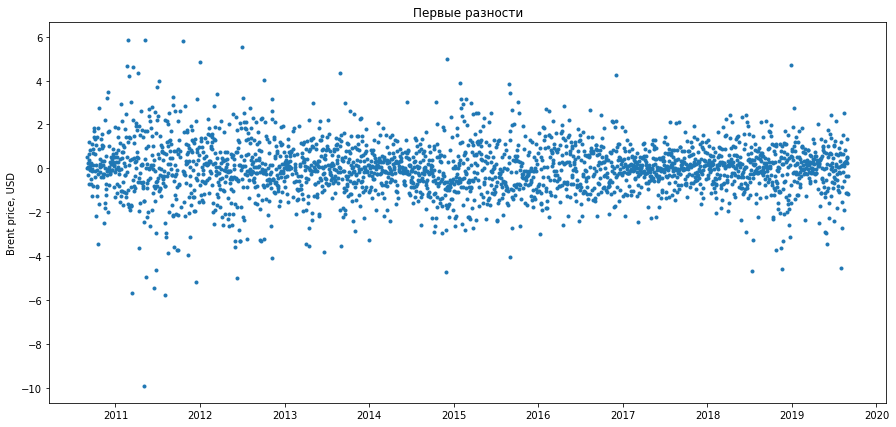

In [5]:
plt.figure( figsize=( 15, 7 ))
plt.ylabel('Brent price, USD')
plt.plot(df.index.get_level_values('Дата'),df['diffs'], '.')
plt.title( 'Первые разности' )
plt.show()

In [6]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll_diff = rub_doll['curs'].values[1:] - rub_doll['curs'].values[:-1]
rub_doll['diffs'] = 0.0
rub_doll['diffs'].values[1:] = rub_doll_diff
rub_doll.head()

,curs,diffs
2010-09-01,30.8669,0.0000
2010-09-02,30.8001,-0.0668
2010-09-03,30.6858,-0.1143
2010-09-04,30.6922,0.0064
2010-09-07,30.5771,-0.1151


In [7]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values)
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e_diff = rub_e['curs'].values[1:] - rub_e['curs'].values[:-1]
rub_e['diffs'] = 0.0
rub_e['diffs'].values[1:] = rub_e_diff
rub_e.head()

,curs,diffs
2010-09-01,39.0127,0.0000
2010-09-02,39.1654,0.1527
2010-09-03,39.2901,0.1247
2010-09-04,39.3505,0.0604
2010-09-07,39.4720,0.1215


In [10]:
df.loc[df.index, 'rub_doll'] = rub_doll.loc[df.index, 'diffs']
df.loc[df.index, 'rub_e'] = rub_e.loc[df.index, 'diffs']
df['rub_doll'] = df['rub_doll'].fillna(0.0)
df['rub_e'] = df['rub_e'].fillna(0.0)
df.head()

,Значение,year,quarter,weekofyear,is_holiday,diffs,rub_doll,rub_e
Дата,,,,,,,,
2010-09-01,76.37,2010,3,35,0,0.00,0.0000,0.0000
2010-09-02,76.89,2010,3,35,0,0.52,-0.0668,0.1527
2010-09-03,76.57,2010,3,35,0,-0.32,-0.1143,0.1247
2010-09-04,76.62,2010,3,35,0,0.05,0.0064,0.0604
2010-09-05,76.63,2010,3,35,0,0.01,0.0000,0.0000


In [11]:
df_w = df.resample("W").apply('mean')

In [12]:
np.where(np.isnan(df_w))

(array([58, 58, 58, 58, 58, 58, 58, 58], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64))

In [13]:
df_w.iloc[58] = df_w.iloc[57]

In [14]:
df_w_start = df_w['Значение'].values[0]
df_w_cn = df_w.copy()
df_w = df_w.drop(columns=['Значение'])
df_w.head()

,year,quarter,weekofyear,is_holiday,diffs,rub_doll,rub_e
Дата,,,,,,,
2010-09-05,2010.0,3.000000,35.0,0.000000,0.052000,-0.034940,0.067560
2010-09-12,2010.0,3.000000,36.0,0.166667,0.288333,0.033583,-0.026467
2010-09-19,2010.0,3.000000,37.0,0.000000,-0.021667,0.021433,0.187483
2010-09-26,2010.0,3.000000,38.0,0.000000,0.118333,-0.013250,0.121083
2010-10-03,2010.0,3.333333,39.0,0.000000,0.791667,-0.072567,0.029883


In [15]:
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

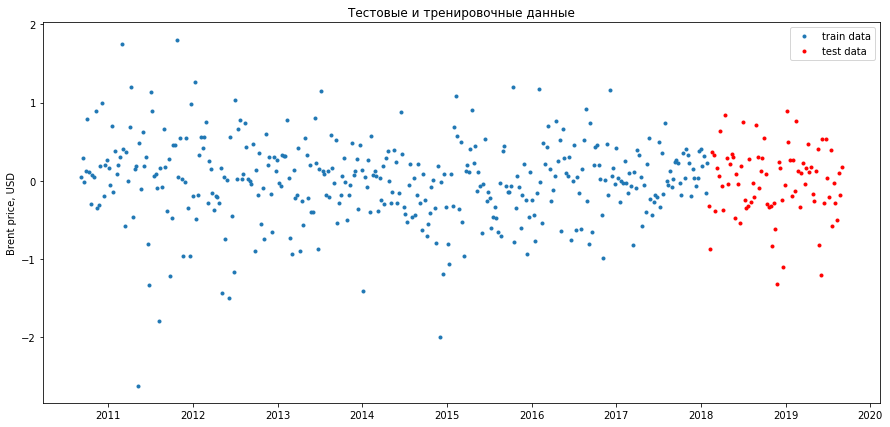

In [16]:
date_for_split = '02-01-2018'

train, test = split_data_b( df_w, date_for_split)
plt.figure( figsize=( 15, 7 ))
plt.ylabel('Brent price, USD')
plt.plot(train.index.get_level_values('Дата'),train['diffs'], '.', label='train data' )
plt.plot(test.index.get_level_values('Дата'),test['diffs'], '.', label='test data', color='r')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

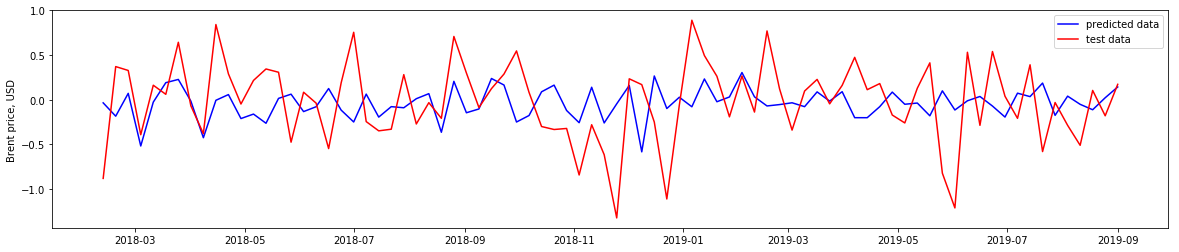

ошибка градиентного бустинга :   131.8482096324241 %


In [21]:
h = 1
X_train_1 = train.iloc[:-h,:]
y_train_1 = train['diffs'].values[h:]
X_test_1 = test.iloc[:-h,:]
y_test_1 = test['diffs'].values[h:]

model_gb_1 = GradientBoostingRegressor(max_depth=10, random_state=21, n_estimators=100)
model_gb_1.fit( X_train_1, y_train_1 ) 
X_test_pred_gb_1 = model_gb_1.predict(X_test_1)
plt.figure( figsize=( 20, 4 ))

plt.ylabel('Brent price, USD')
plt.plot(test.index[h:],X_test_pred_gb_1, label='predicted data', color='b' )
plt.plot(test.index[h:],y_test_1, label='test data', color='r')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_1, y_pred=X_test_pred_gb_1)

print('ошибка градиентного бустинга :  ', er_g, '%')

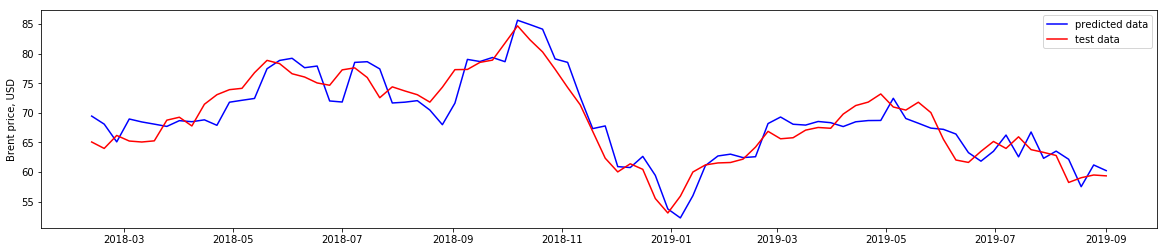

ошибка градиентного бустинга :   3.3796692898041436 %


In [23]:
train, test = split_data_b( df_w_cn, date_for_split)

h = 1
X_train_1 = train.iloc[:-h,:]
y_train_1 = train['Значение'].values[h:]
X_test_1 = test.iloc[:-h,:]
y_test_1 = test['Значение'].values[h:]

model_gb_1 = GradientBoostingRegressor(max_depth=5, random_state=21, n_estimators=100)
model_gb_1.fit( X_train_1, y_train_1 ) 
X_test_pred_gb_1 = model_gb_1.predict(X_test_1)
plt.figure( figsize=( 20, 4 ))

plt.ylabel('Brent price, USD')
plt.plot(test.index[h:],X_test_pred_gb_1, label='predicted data', color='b' )
plt.plot(test.index[h:],y_test_1, label='test data', color='r')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_1, y_pred=X_test_pred_gb_1)

print('ошибка градиентного бустинга :  ', er_g, '%')

Очень высок уровень ошибки при предсказании по первым разностям. Возможно это связано с тем что характер временного ряда не позволяет строить адекватные предсказания по первым разностям